In [1]:
# STEP 1 import libraries
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# STEP-2 define activation function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sigmoid_output):
    return sigmoid_output * (1 - sigmoid_output)


In [3]:
#STEP-3 initialize dataset


X = np.random.rand(100, 1)   # 100 samples, 1 feature
y = 2 * X
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (100, 1)
y shape: (100, 1)


In [4]:
    # Network architecture
    input_size = 1
    hidden_size = 10
    output_size = 1
    
    W1 = np.random.randn(input_size, hidden_size) * 0.01   # Input TO Hidden
    W2 = np.random.randn(hidden_size, output_size) * 0.01  # Hidden TO Output
    
    b1 = np.random.randn(1, hidden_size) * 0.01
    b2 = np.random.randn(1, output_size) * 0.01
    
    print("W1 shape:", W1.shape)  # (1, 5)
    print("b1 shape:", b1.shape)  # (1, 5)
    print("W2 shape:", W2.shape)  # (5, 1)
    print("b2 shape:", b2.shape)  # (1, 1)
    
    


W1 shape: (1, 10)
b1 shape: (1, 10)
W2 shape: (10, 1)
b2 shape: (1, 1)


In [5]:
learning_rate = 0.01
epochs = 1000
losses = []

for epoch in range(epochs):

    # forward
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2      
    y_pred = z2

    # loss
    loss = np.mean((y - y_pred) ** 2)

    # backprop
    d_output = (y_pred - y)

    dW2 = np.dot(a1.T, d_output)
    db2 = np.sum(d_output, axis=0, keepdims=True)

    error_hidden = np.dot(d_output, W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    dW1 = np.dot(X.T, d_hidden)
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    # update weights
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    losses.append(loss)

print(f"All Epoch done, Loss: {loss:.6f}")


All Epoch done, Loss: 0.004804


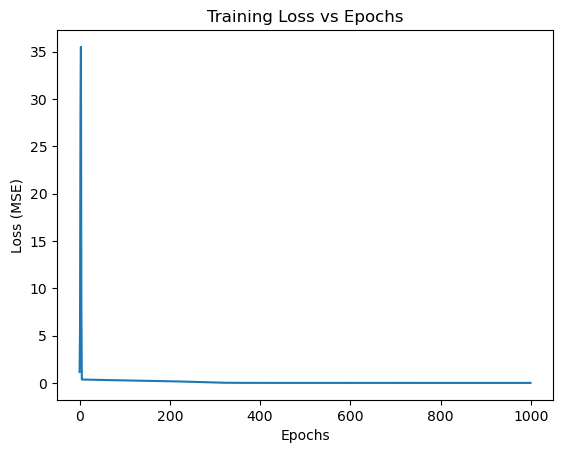

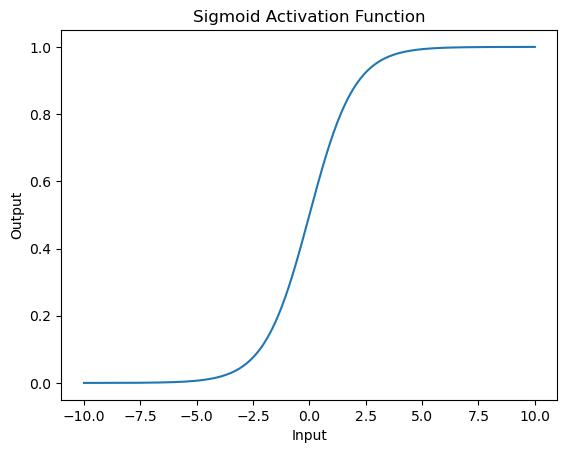

In [6]:
#STEP 7 VISUALIZE RESULTS
# ---------- Loss vs Epochs ----------
epochs = np.arange(len(losses))

plt.figure()
plt.plot(epochs, losses)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs Epochs")
plt.show()

# sigmoid activation function
x = np.linspace(-10, 10, 400)
y_sigmoid = 1 / (1 + np.exp(-x))

plt.figure()
plt.plot(x, y_sigmoid)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Sigmoid Activation Function")
plt.show()


In [7]:
#TEST PREDICTION
X_test = np.array([[0.7]])

z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)          

z2_test = np.dot(a1_test, W2) + b2  

print("Test input X:", X_test)
print("Predicted output:", z2_test)


Test input X: [[0.7]]
Predicted output: [[1.41568673]]
